<b><font size=20, color='#A020F0'>Final 573 Project</font></b>


#### Becca Hall

The tropics contain around 40% of the human population (Wilkinson, 2014). The processes that occur there are thus vital to those people and are also fundamental to the stability of Earth's climate. Massive organized cloud systems, known as mesoscale convective systems (MCS) are of fundamental importance to tropical weather and climate, accounting for nearly 93% of the annual precipitation seen between the latitudes of 30 degrees north and 30 degrees south (Roca & Fiolleau, 2020). More formally, these systems are defined as a complex of thunderstorms which are larger than an individual thunderstorm yet smaller than an extratropical cyclone and typically see lifetimes on the order of several hours or longer. They can be observed in both round or linear shapes and typically include weather systems such as tropical cyclones, squall lines, and mesoscale convective complexes (MCC) (among others). The title of MCS is often used to describe a cluster of thunder storms that does not satisfy the size, shape, or duration criteria of MCCs (National Weather Service, n.d.). Better understanding MCS structure means better simulation of them in both climate and forecasting models potentially leading to drastic improvements to the people residing within the tropics.

## Getting datasets that won't crash the aos jupyterhub!

Aquiring data and getting it into a small enough and usable format was honestly the hardest and most time-consuming part of this project. I knew I wanted to analyze the thermodynamic structure of MCSs but no datasets currently have exactly what I was looking for, so I decided to combine a tracking dataset with ERA5 reanalysis product in order to create the dataset I needed. The tracking dataset I used is from Tracked IMERG Mesoscale Precipitation Systems (TIMPS) which is a dataset of precipitation systems tracked in the Integrated Multi-satellite Retrievals for Global Precipitation Measurement (IMERG) precipitation product. This data and its documentation can be found here: https://jrussell.chpc.utah.edu/timps/. ERA5 data can be accessed from this site: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview.
The data from TIMPS was very large, so Sayali Kulkarni at the University of Virginia sent me two years of data she had already isolated and downloaded. This dataset was still very big, around 6 gigabytes. So I decided to further cut the data down to be for just one year (2015) and that I would only be looking at MCSs in the central tropics (from 15 degrees north to 15 degrees south). When I began trying to download the ERA5 data, I realized that was still too large of a domain as the data was around 8 gigabytes per variable. To resolve this issue, I decided to focus my analysis to the northeastern corner of South America to see how MCS in that specfic region grew, propagated, and subsequently died.
(Also I am so sorry for how long some of these cells take to run!)

In [1]:
#Import the needed libraries and load in the TIMPS data
import numpy as np
import xarray as xr
import pandas as pd
timps=pd.read_csv('timps_2015.csv')
timps

Unnamed: 0                 time  centrallat  centrallon   MCS_ID  \
0          3943713  2015-01-01 00:00:00  -13.156667  -65.476667   144826   
1          3942666  2015-01-01 00:00:00   -2.700000  -70.150000  2613291   
2          3940876  2015-01-01 00:00:00   -7.048095  -61.965238  2611843   
3          3940842  2015-01-01 00:00:00   -0.536061  -69.168794  2611833   
4          3940826  2015-01-01 00:00:00  -14.010000  -70.170001  2611819   
...            ...                  ...         ...         ...      ...   
327405     7728158  2015-12-31 23:30:00    2.005080  -80.402407  2515587   
327406     7733627  2015-12-31 23:30:00   -0.998718  -71.573077  2519567   
327407     7727416  2015-12-31 23:30:00   -9.311589  -76.838741  2514936   
327408     7734190  2015-12-31 23:30:00   -7.199057  -64.764151  2520027   
327409     7732679  2015-12-31 23:30:00   -5.762632  -60.101579  2519020   

        stage  
0           0  
1           2  
2           3  
3           2  
4           3  
...       ...  
327405      3  
327406      3  
327407      3  
327408      2  
327409      3  

[327410 rows x 6 columns]

In [2]:
#load in the ERA5 data:
CAPE=xr.open_dataset('era5_cape.nc')
CIN=xr.open_dataset('era5_cin.nc')
TCW=xr.open_dataset('era5_tcw.nc')
#look at the data:
TCW

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00
Data variables:
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 23:52:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Here we can see the ERA5 data has coordinates of longitude from -90 to -60, latitude from -15 to 15, and time over the year of 2015 with time steps of 1 hour. The CAPE and CIN variables are in units of J/kg while the TCW is in units of kg/m^2.

## MCS Lifecycle

The lifecycle of the MCS depends heavily on three major factors: the duration of the system, the time of the maximum areal extent, and the maximum attained size. From these, the lifecycle can be broken down broadly into 3 main parts: a growing or formation phase, maturity, and subsequent decay. The growing phase corresponds to an increasing stratiform region which is fed by the active convective cells that have a lifetime that is larger than the stratiform region's dissipation rate. In this phase, individual deep convective cells are triggered and bring condensated materials aloft. The next part of the MCS lifecycle is the propagation and maturity phase. Here the deep convection cells still exist while the stratiform anvil and the mesoscale circulation begins to build up. The stratiform anvil is precipitating and is made up of cloud material originating from previously active deep convective cells. The condensated material is then removed from the top of the MCS via precipitation. The last phase of the MCS lifecycle is the decaying phase and is characterized by a faster dissipation of the stratiform region than the new active convection is able to keep up with. Eventually deep convection stops alltogether and the anvil cloud begins to fade out. The stratiform rain will then stop as well and the remaining anvil will dissipate. From there, microphysical processes influence how the remaining cloud particles will dissipate (Houze, 2004).

In [3]:
growth = timps[timps['stage']==1]
mature = timps[timps['stage']==2]
decay = timps[timps['stage']==3]
growth

Unnamed: 0                 time  centrallat  centrallon   MCS_ID  \
10         3943526  2015-01-01 00:00:00    1.913636  -77.913636  2613900   
18         3943527  2015-01-01 00:30:00    1.929167  -77.891666  2613900   
27         3943528  2015-01-01 01:00:00    1.771212  -78.040909  2613900   
35         3943529  2015-01-01 01:30:00    1.656818  -78.163636  2613900   
55         3944448  2015-01-01 02:00:00   -7.465385  -70.596154   145224   
...            ...                  ...         ...         ...      ...   
327375     7734186  2015-12-31 21:30:00   -6.900355  -64.579788  2520027   
327381     7735445  2015-12-31 22:00:00   -6.878571  -60.250000  2520989   
327388     7735446  2015-12-31 22:30:00   -6.882143  -60.260714  2520989   
327401     7735447  2015-12-31 23:00:00   -6.890625  -60.262500  2520989   
327403     7735448  2015-12-31 23:30:00   -6.920492  -60.389344  2520989   

        stage  
10          1  
18          1  
27          1  
35          1  
55          1  
...       ...  
327375      1  
327381      1  
327388      1  
327401      1  
327403      1  

[94472 rows x 6 columns]

In [4]:
print(len(growth),len(mature),len(decay))
#Here we can see that the growth stage has the most amount of time steps while the decay stage has the least amount. 
#This may be a result that not all MCSs go through a complete lifecycle. Many may begin building, but never truly form the
#stratiform anvil and the mesoscale circulation before dissipating. 

94472 80319 75693


## Co-locating the ERA5 and TIMPS datasets

In this section, I co-located the tracking TIMPS and the ERA5 datasets. I added a resolution so I could get a 10 deg by 10 deg grid of the ERA5 variables around the central latitude and longitude.

In [5]:
for i in range(len(timps)):
    
    timps_sub = timps.iloc[i]       # Selecting one single row of all the columns of the dataset
    time = timps_sub.time        # Selecting one single timestep
    lon = timps_sub.centrallon   # Central longitude of the MCS
    lat = timps_sub.centrallat   # Central latitude of the MCS
    res = 5                   # Input half of the desired grid size
    
    # The TIMPS dataset is at 30 mins interval
    # ERA5 data is at one-hour interval
    # now co-locate MCS center with ERA5 data and extract 10 x 10 degrees gridbox around it.
    
    snapshot_CAPE = CAPE.sel(time=time,method='nearest').sel(longitude=slice(lon-res,lon+res),latitude=slice(lat+res,lat-res)).cape.values
    snapshot_CIN = CIN.sel(time=time,method='nearest').sel(longitude=slice(lon-res,lon+res),latitude=slice(lat+res,lat-res)).cin.values
    snapshot_TCW = TCW.sel(time=time,method='nearest').sel(longitude=slice(lon-res,lon+res),latitude=slice(lat+res,lat-res)).tcw.values

    
    #break
    


In [6]:
#I used the commented out break in the previous cell to determine if the code was running correctly on the
#first step and then printed this cell because it takes a pretty long time to run the previous cell.
print(i)
print(time)
print(lon)
print(lat)

327409
2015-12-31 23:30:00
-60.101579055175705
-5.762631576939633


Text(0.5, 0, 'Longitude [deg]')

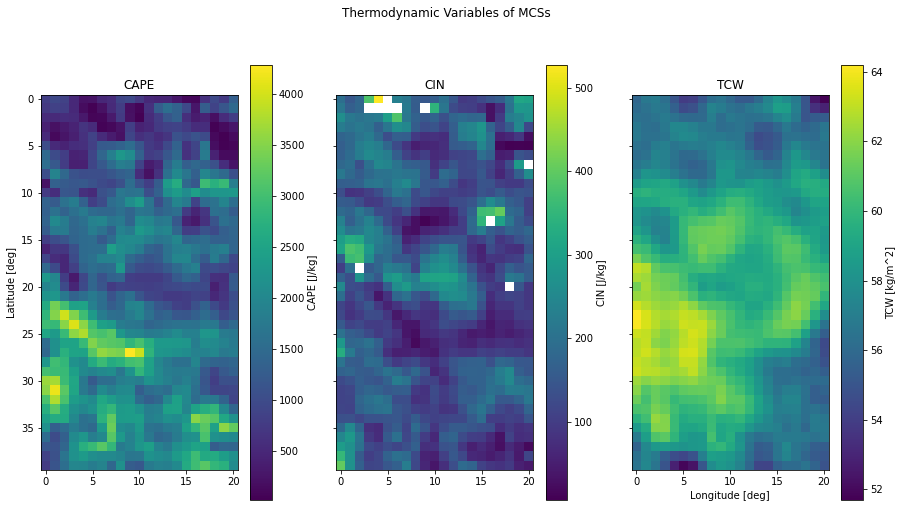

In [7]:
#plotting the snapshots
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,8),sharey=True)
ax1=ax[0].imshow(snapshot_CAPE)
fig.suptitle('Thermodynamic Variables of MCSs')
ax[0].set_ylabel('Latitude [deg]')
ax[0].set_title('CAPE')
fig.colorbar(ax1,ax=ax[0],label='CAPE [J/kg]')

ax2=ax[1].imshow(snapshot_CIN)
ax[1].set_title('CIN')
fig.colorbar(ax2,ax=ax[1],label='CIN [J/kg]')

ax3=ax[2].imshow(snapshot_TCW)
ax[2].set_title('TCW')
fig.colorbar(ax3,ax=ax[2],label='TCW [kg/m^2]')
plt.xlabel('Longitude [deg]')

## Stage One of the MSC Lifecycle: Formation & Growth

In [55]:
#co-locating at the central lat and lon of each MCS time step for the three ERA5 variables
cape1=[]
cin1=[]
tcw1=[]
for i in range(0,len(growth)):
    cpt=CAPE.sel(time=growth.time.values[i],method='nearest').sel(longitude=growth.centrallon.values[i],latitude=growth.centrallat.values[i],method='nearest')
    cape1.append(cpt.cape.values)

    cint=CIN.sel(time=growth.time.values[i],method='nearest').sel(longitude=growth.centrallon.values[i],latitude=growth.centrallat.values[i],method='nearest')
    cin1.append(cint.cin.values)
    
    tcwt=TCW.sel(time=growth.time.values[i],method='nearest').sel(longitude=growth.centrallon.values[i],latitude=growth.centrallat.values[i],method='nearest')
    tcw1.append(tcwt.tcw.values)


Text(0.5, 0, 'Julian Day')

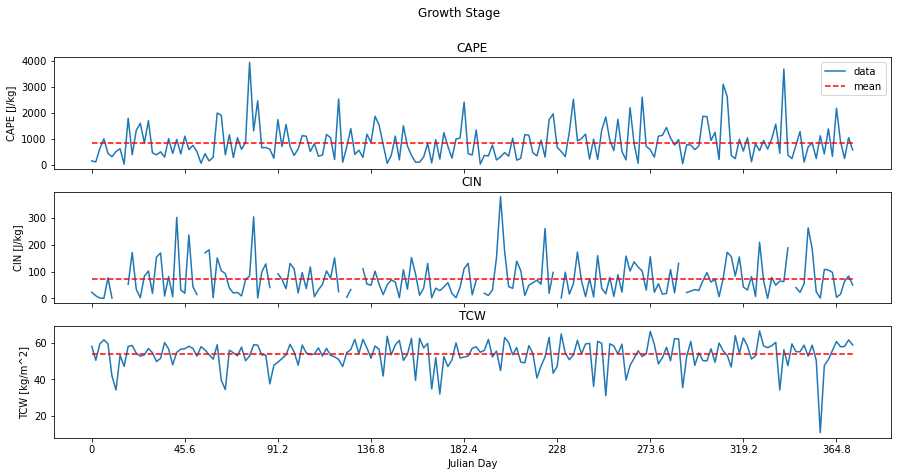

In [56]:
#three panel plot of the variables
fig,ax=plt.subplots(3,1,figsize=(15,7),sharex=True)
ax[0].plot(cape1[::500],label='data')
fig.suptitle('Growth Stage')
ax[0].set_ylabel('CAPE [J/kg]')
ax[0].set_title('CAPE')
y_avg1 = [np.mean(cape1)] * len(cape1[::500])
ax[0].plot(y_avg1, color='red', ls='--',label='mean')
ax[0].legend()

ax[1].plot(cin1[::500])
ax[1].set_title('CIN')
ax[1].set_ylabel('CIN [J/kg]')
y_avg2 = [np.nanmean(cin1)] * len(cin1[::500])
ax[1].plot(y_avg2, color='red', ls='--')

ax[2].plot(tcw1[::500])
ax[2].set_title('TCW')
ax[2].set_ylabel('TCW [kg/m^2]')
y_avg3 = [np.mean(tcw1)] * len(tcw1[::500])
ax[2].plot(y_avg3, color='red', ls='--')

xtick=np.arange(0,207,23)
label=['0','45.6','91.2','136.8','182.4','228','273.6','319.2','364.8']
plt.xticks(xtick,label)
plt.xlabel('Julian Day')

## Stage Two of the MSC Lifecycle: Maturity & Propagation

In [58]:
#co-locating at the central lat and lon of each MCS time step for the three ERA5 variables
cape2=[]
cin2=[]
tcw2=[]
for i in range(0,len(mature)):
    cpt=CAPE.sel(time=mature.time.values[i],method='nearest').sel(longitude=mature.centrallon.values[i],latitude=mature.centrallat.values[i],method='nearest')
    cape2.append(cpt.cape.values)

    cint=CIN.sel(time=mature.time.values[i],method='nearest').sel(longitude=mature.centrallon.values[i],latitude=mature.centrallat.values[i],method='nearest')
    cin2.append(cint.cin.values)
    
    tcwt=TCW.sel(time=mature.time.values[i],method='nearest').sel(longitude=mature.centrallon.values[i],latitude=mature.centrallat.values[i],method='nearest')
    tcw2.append(tcwt.tcw.values)


Text(0.5, 0, 'Julian Day')

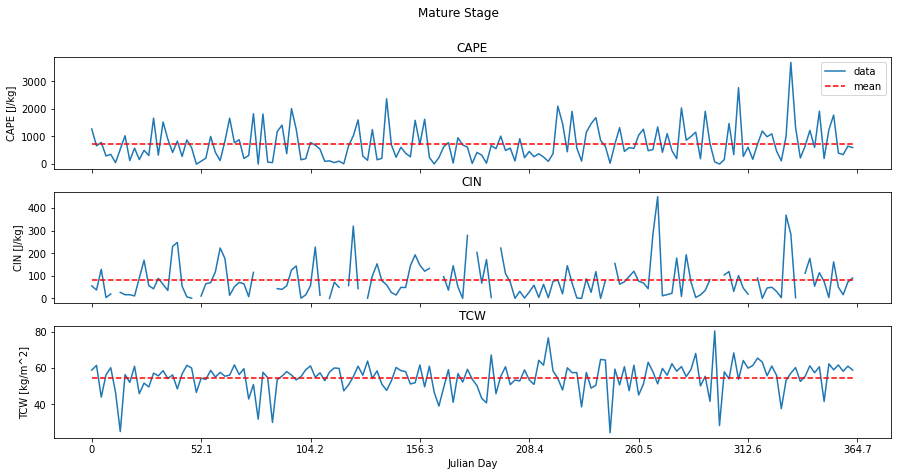

In [63]:
#three panel plot of the variables
fig,ax=plt.subplots(3,1,figsize=(15,7),sharex=True)
ax[0].plot(cape2[::500],label='data')
fig.suptitle('Mature Stage')
ax[0].set_ylabel('CAPE [J/kg]')
ax[0].set_title('CAPE')
y_avg1 = [np.mean(cape2)] * len(cape2[::500])
ax[0].plot(y_avg1, color='red', ls='--',label='mean')
ax[0].legend()

ax[1].plot(cin2[::500])
ax[1].set_title('CIN')
ax[1].set_ylabel('CIN [J/kg]')
y_avg2 = [np.nanmean(cin2)] * len(cin2[::500])
ax[1].plot(y_avg2, color='red', ls='--')

ax[2].plot(tcw2[::500])
ax[2].set_title('TCW')
ax[2].set_ylabel('TCW [kg/m^2]')
y_avg3 = [np.mean(tcw2)] * len(tcw2[::500])
ax[2].plot(y_avg3, color='red', ls='--')

xtick=np.arange(0,184,23)
label=['0','52.1','104.2','156.3','208.4','260.5','312.6','364.7']
plt.xticks(xtick,label)
plt.xlabel('Julian Day')

## Stage Three of the MSC Lifecycle: Decay

In [64]:
#co-locating at the central lat and lon of each MCS time step for the three ERA5 variables
cape3=[]
cin3=[]
tcw3=[]
for i in range(0,len(decay)):
    cpt=CAPE.sel(time=decay.time.values[i],method='nearest').sel(longitude=decay.centrallon.values[i],latitude=decay.centrallat.values[i],method='nearest')
    cape3.append(cpt.cape.values)

    cint=CIN.sel(time=decay.time.values[i],method='nearest').sel(longitude=decay.centrallon.values[i],latitude=decay.centrallat.values[i],method='nearest')
    cin3.append(cint.cin.values)
    
    tcwt=TCW.sel(time=decay.time.values[i],method='nearest').sel(longitude=decay.centrallon.values[i],latitude=decay.centrallat.values[i],method='nearest')
    tcw3.append(tcwt.tcw.values)
    

152


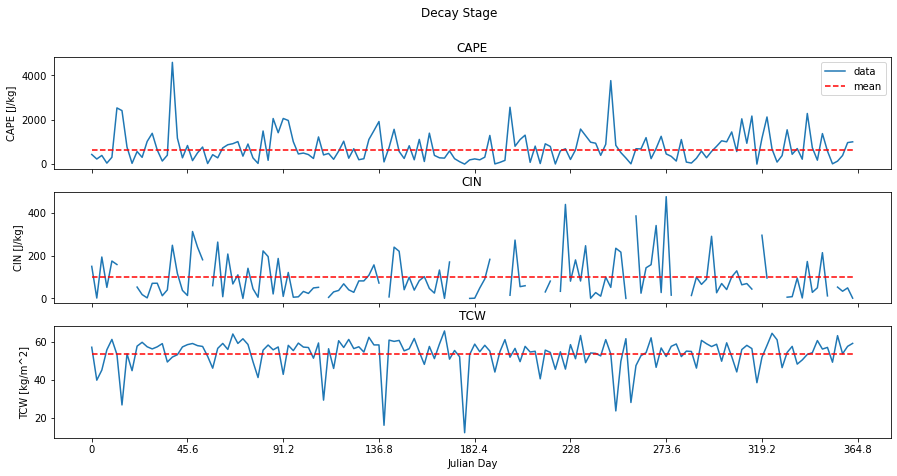

In [67]:
#three panel plot of the variables
fig,ax=plt.subplots(3,1,figsize=(15,7),sharex=True)
ax[0].plot(cape3[::500],label='data')
fig.suptitle('Decay Stage')
ax[0].set_ylabel('CAPE [J/kg]')
ax[0].set_title('CAPE')
y_avg1 = [np.mean(cape3)] * len(cape3[::500])
ax[0].plot(y_avg1, color='red', ls='--',label='mean')
ax[0].legend()

ax[1].plot(cin3[::500])
ax[1].set_title('CIN')
ax[1].set_ylabel('CIN [J/kg]')
y_avg2 = [np.nanmean(cin3)] * len(cin3[::500])
ax[1].plot(y_avg2, color='red', ls='--')

ax[2].plot(tcw3[::500])
ax[2].set_title('TCW')
ax[2].set_ylabel('TCW [kg/m^2]')
y_avg3 = [np.mean(tcw3)] * len(tcw3[::500])
ax[2].plot(y_avg3, color='red', ls='--')

xtick=np.arange(0,171,19)
label=['0','45.6','91.2','136.8','182.4','228','273.6','319.2','364.8']
plt.xticks(xtick,label)
plt.xlabel('Julian Day')
print(len(tcw3[::500]))

Text(0.5, 0, 'MCS Lifecycle Stage')

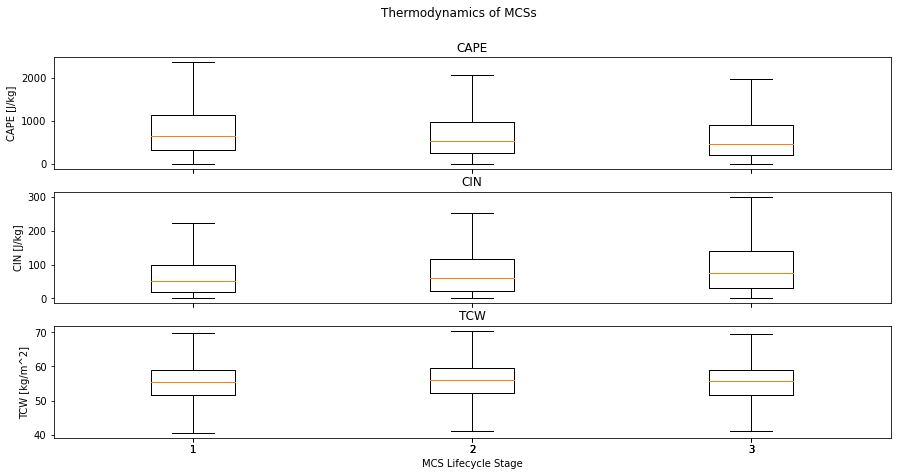

In [89]:
#three panel box and whisker plot for each variable at each lifecycle stage
fig,ax=plt.subplots(3,1,figsize=(15,7),sharex=True)
ax[0].boxplot([cape1,cape2,cape3],showfliers=False)
fig.suptitle('Thermodynamics of MCSs')
ax[0].set_ylabel('CAPE [J/kg]')
ax[0].set_title('CAPE')

#need to turn cin into a dataframe so I can drop the nan values so the boxplots will show
cin1 = pd.DataFrame(cin1).dropna()
cin2 = pd.DataFrame(cin2).dropna()
cin3 = pd.DataFrame(cin3).dropna()

ax[1].boxplot([cin1['cin'],cin2['cin'],cin3['cin']],showfliers=False)
ax[1].set_title('CIN')
ax[1].set_ylabel('CIN [J/kg]')

ax[2].boxplot([tcw1,tcw2,tcw3],showfliers=False)
ax[2].set_title('TCW')
ax[2].set_ylabel('TCW [kg/m^2]')

plt.xlabel('MCS Lifecycle Stage')


## Conclusions

These preliminary results show a lot of variation present within the data. Despite that, some trends can be discerned. Looking at the CAPE values, there is a lot of noise for all three stages of the lifecycle with mean values falling around 800 J/kg. An interesting thing to note with the CAPE data, however, is the slightly higher mean and maximum values during the growth stage as compared to the mature and decay phases. This makes intuitive sense as a higher CAPE means a higher maximum potential vertical speed within an updraft; convection is more easily able to occur and thus it makes sense that during the growing phase (where a lot of localized convection is required to occur) there are elevated levels of CAPE. CIN showed a strikingly similar trend to the CAPE. With a lot of variability present and mean values around 50 J/kg, there is a noticeable rise in the mean and maximum values but in the decay stage of the MCS lifecycle. This was expected as well; a higher CIN makes new convection less likely to occur and during the decay phase, convection is seen to either significantly slow or even stop completely. A higher CIN means less convection for the system thus it is more likely to be decaying. TCW values didn't show any significant changes between MCS lifecycle stages. With mean values around 55 kg/m^2 for each of the three stages, TCW doesn't vary as much as compared to the CAPE and CIN values both between lifecycle stages and even within the course of a year itself (as seen in the figures above of the average thermodynamic variables across 2015).

Sources:

[1] Wilkinson, A. (2014, June 29). Expanding tropics will play greater global role, report predicts. https://www.science.org/content/article/expanding-tropics-will-play-greater-global-role-report-predicts


[2] Roca, R., Fiolleau, T. (2020) Extreme precipitation in the tropics is closely associated with long-lived convective systems. Commun Earth Environ 1, 18 https://doi.org/10.1038/s43247-020-00015-4


[3] NOAA’s National Weather Service - Glossary. (n.d.). Forecast.weather.gov. Retrieved September 27, 2022, from https://forecast.weather.gov/glossary.php?word=MCS


[4] Houze, R. A. (2004). Mesoscale convective systems. Reviews of Geophysics, 42(4). https://doi.org/10.1029/2004rg000150